In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
import morphs
from morphs.data.derivative import f_map

from sklearn.model_selection import LeaveOneGroupOut, cross_validate

logo = LeaveOneGroupOut()
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="lbfgs")

from xgboost import XGBClassifier

xgb = XGBClassifier()

/usr/local/anaconda/envs/morphs36/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/usr/local/anaconda/envs/morphs36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
ddf = morphs.load.derivative_df()
dd = morphs.load.derivative_dict()
max_order = morphs.data.derivative.find_max_order(dd)
print(max_order)

13


In [3]:
def cv_morph_dim_prediction(ddf, discriminator, eval_f=True):
    scores = {}
    for order in range(max_order + 1):
        tstart = datetime.datetime.now()
        xs = ddf[order][ddf[order].str[0].notna()]
        if eval_f:
            xs = xs.map(f_map)
        xs = np.array([x for x in xs.values])
        labels = ddf["morph_dim"][ddf[order].str[0].notna()].values
        groups = ddf["block_path"][ddf[order].str[0].notna()].values
        cv_scores = cross_validate(
            discriminator, xs, y=labels, cv=logo.split(xs, labels, groups), n_jobs=-1
        )
        scores[order] = cv_scores["test_score"].mean()
        print(order, scores[order], "time: %s" % (datetime.datetime.now() - tstart))
    return scores

In [4]:
# NBVAL_SKIP
mean_scores = cv_morph_dim_prediction(ddf, lr)

0 0.04166666666666668 time: 0:00:11.646921
1 0.07905982905982907 time: 0:00:11.689734
2 0.13995726495726493 time: 0:00:15.104390
3 0.18269230769230768 time: 0:00:13.387429
4 0.1858974358974359 time: 0:00:16.851314
5 0.13141025641025642 time: 0:00:19.507285
6 0.09745447788926048 time: 0:00:25.603378
7 0.04335465576884342 time: 0:00:25.699038
8 0.09382278692078125 time: 0:00:43.981136
9 0.033517711417211306 time: 0:00:24.641270
10 0.04451687913226375 time: 0:00:20.668642
11 0.04405224405224406 time: 0:00:20.448756
12 0.04677843523997371 time: 0:00:21.574900
13 0.05130534108266902 time: 0:00:23.453556


In [5]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [6]:
# NBVAL_SKIP
xgb_mean_scores = cv_morph_dim_prediction(ddf, xgb)

0 0.04166666666666668 time: 0:00:09.077693
1 0.08440170940170941 time: 0:00:46.985777
2 0.18696581196581194 time: 0:00:48.998245
3 0.26495726495726496 time: 0:00:46.933590
4 0.3333333333333333 time: 0:00:48.600043
5 0.33974358974358976 time: 0:00:53.115035
6 0.3732179656092699 time: 0:00:53.777394
7 0.33031010433756425 time: 0:00:56.388924
8 0.3204185292504716 time: 0:00:52.863320
9 0.3312023266000404 time: 0:00:39.289873
10 0.32856808433731505 time: 0:00:26.633308
11 0.29982503251734016 time: 0:00:28.516046
12 0.3071385167539014 time: 0:00:30.246070
13 0.2871009707042096 time: 0:00:32.630708


In [7]:
# NBVAL_SKIP
mean_popt_scores = cv_morph_dim_prediction(ddf, lr, eval_f=False)

0 0.06623931623931623 time: 0:00:01.035860
1 0.08867521367521367 time: 0:00:01.247378
2 0.1752136752136752 time: 0:00:01.467662
3 0.2051282051282051 time: 0:00:01.748036
4 0.2126068376068376 time: 0:00:02.431236
5 0.19871794871794873 time: 0:00:03.860478
6 0.17493496841322928 time: 0:00:05.161052
7 0.1856080926447059 time: 0:00:05.243642
8 0.13044414885005814 time: 0:00:04.815296
9 0.12705085988605871 time: 0:00:03.649784
10 0.10955974225204994 time: 0:00:03.456179
11 0.13875099259714643 time: 0:00:03.357882
12 0.13695172349018503 time: 0:00:03.412318
13 0.15450581806857114 time: 0:00:03.489010


In [8]:
# NBVAL_SKIP
xgb_mean_popt_scores = cv_morph_dim_prediction(ddf, xgb, eval_f=False)

0 0.10790598290598293 time: 0:00:04.269329
1 0.1891025641025641 time: 0:00:05.194308
2 0.2841880341880342 time: 0:00:06.367024
3 0.3002136752136752 time: 0:00:07.028036
4 0.2895299145299145 time: 0:00:07.862302
5 0.2799145299145299 time: 0:00:09.477632
6 0.23913043478260868 time: 0:00:09.743211
7 0.20397867451643198 time: 0:00:10.570944
8 0.23215585148214038 time: 0:00:10.756659
9 0.18999185402198027 time: 0:00:08.270272
10 0.20193182885490576 time: 0:00:06.858139
11 0.16794281217358142 time: 0:00:07.378042
12 0.19719568181106642 time: 0:00:08.285354
13 0.2051034847593552 time: 0:00:09.232991


In [9]:
# NBVAL_SKIP
all_scores = [xgb_mean_scores, xgb_mean_popt_scores, mean_popt_scores, mean_scores]
labels = [
    "XGBoost on curve",
    "XGBoost on parameters",
    "multinomial logistic regression on parameters",
    "multinomial logistic regression on curve",
]

def plot_classify_thielk(
    all_scores,
    labels,
    chance=1 / 24,
    ax=None,
    legend=False,
    cmap=sns.color_palette(),
    max_order=max_order,
):
    if not ax:
        ax = plt.gca()
    orders = range(max_order + 1)
    for i, (scores, label) in enumerate(zip(all_scores, labels)):
        y = [scores[order] for order in orders]
        _ = ax.plot(orders, y, ".--", color=cmap[i], label=label)
        _ = ax.fill_between(orders, chance, y, color=cmap[i], alpha=0.3)
        _ = ax.plot(np.argmax(y), np.max(y), "o", color=cmap[i])
        _ = ax.plot(
            [np.argmax(y), np.argmax(y)],
            [chance, np.max(y)],
            color=cmap[i],
            zorder=1,
        )

    _ = ax.axhline(chance, linestyle=":", color="k")
    _ = ax.set_ylabel("Average held-out Population Accuracy")
    _ = ax.set_xlabel("Polynomial Order")
    _ = ax.set_xlim(0, max_order)

    if legend:
        _ = ax.set_ylim(-0.14, 0.4)
        _ = ax.legend()
    else:
        _ = ax.set_ylim(0, 0.4)

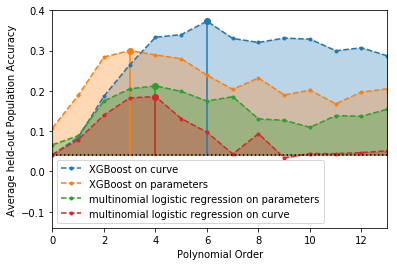

In [10]:
# NBVAL_SKIP
plot_classify_thielk(all_scores, labels, legend=True)

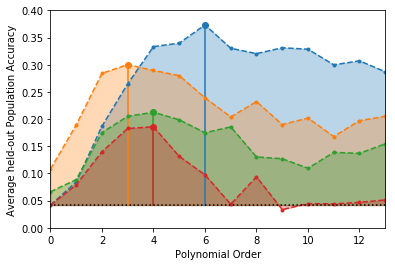

In [11]:
# NBVAL_SKIP
plot_classify_thielk(all_scores, labels)
morphs.plot.savefig(plt.gcf(), "classify-thielk")

Multinomial logistic regression seems to perform better on the parameters than the evaluated function. However, xgboost is able to extract more structure from evaluated higher order Thielk curves. This is likely due to me normalizing the total integral to 1 when evaluated.

Main points to take away from the figure:
1. Accuracy is above chance (1/24)
2. Peaks occur near 4th order polynomial (and therefore, just choosing 4th order is justifiable)